# 常见的卷积核

In [14]:
import torch
from torch.nn import functional as F
from d2l import torch as d2l

In [3]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=256)

In [11]:
for X, y in test_iter: break
X.shape, y.shape

(torch.Size([256, 1, 28, 28]), torch.Size([256]))

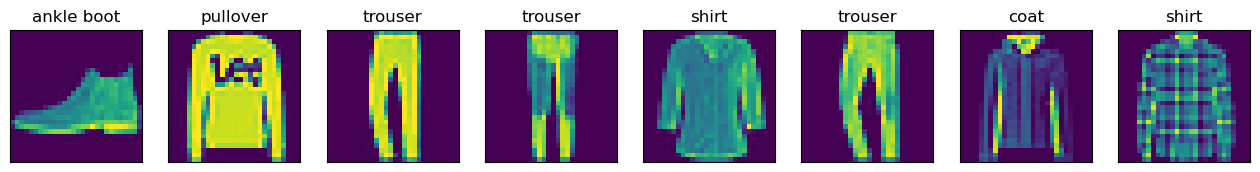

In [59]:
n = 8; d2l.show_images(X[0:n].reshape((n,28,28)), 1, n, scale=2, titles=d2l.get_fashion_mnist_labels(y)[0:n]);

In [34]:
imgs = X[0:n]
imgs.shape

torch.Size([8, 1, 28, 28])

Sobel卷积核：用于检测图像的边缘，有水平和垂直两种方向。

In [21]:
sobel_vertical = torch.tensor([
  [-1, -2, -1],
  [ 0,  0,  0],
  [ 1,  2,  1],
], dtype=torch.float32)
sobel_horizontal = sobel_vertical.t()

In [30]:
F.conv2d(imgs, sobel_vertical.reshape((1,1,3,3)), padding=1).shape

torch.Size([8, 1, 28, 28])

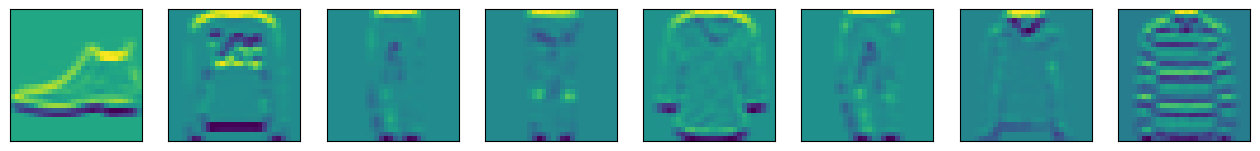

In [35]:
d2l.show_images(F.conv2d(imgs, sobel_vertical.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

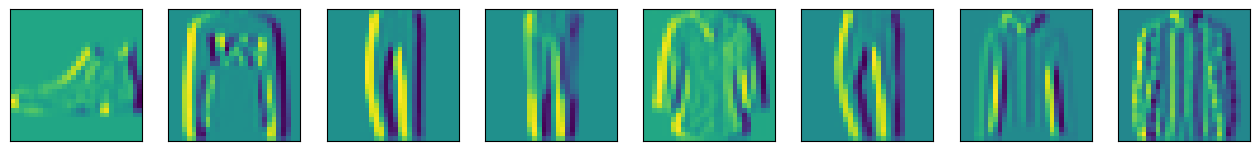

In [36]:
d2l.show_images(F.conv2d(imgs, sobel_horizontal.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

Prewitt卷积核：类似于Sobel，也用于边缘检测。

In [37]:
prewitt_vertical = torch.tensor([
  [-1, -1, -1],
  [ 0,  0,  0],
  [ 1,  1,  1],
], dtype=torch.float32)
prewitt_horizontal = prewitt_vertical.t()

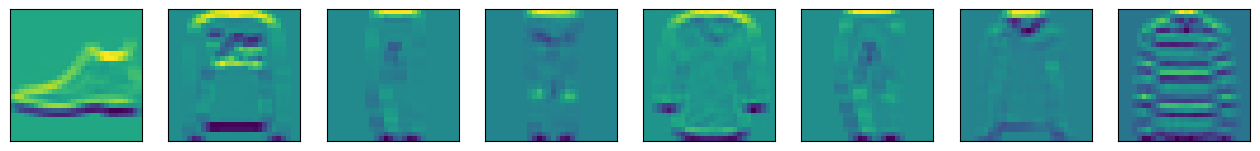

In [38]:
d2l.show_images(F.conv2d(imgs, prewitt_vertical.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

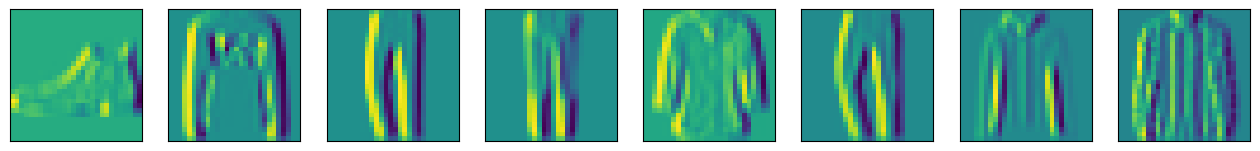

In [39]:
d2l.show_images(F.conv2d(imgs, prewitt_horizontal.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

拉普拉斯卷积核：边缘检测；锐化

In [41]:
laplacian = torch.tensor([
  [ 0, -1,  0],
  [-1,  4, -1],
  [ 0, -1,  0]
], dtype=torch.float32)

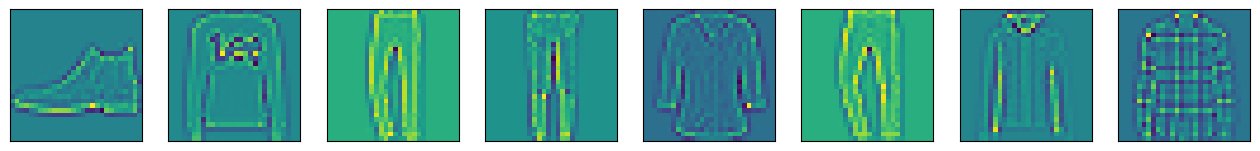

In [42]:
d2l.show_images(F.conv2d(imgs, laplacian.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

浮雕卷积核

In [43]:
emboss = torch.tensor([
  [-2, -1,  0],
  [-1,  1,  1],
  [ 0,  1,  2]
], dtype=torch.float32)

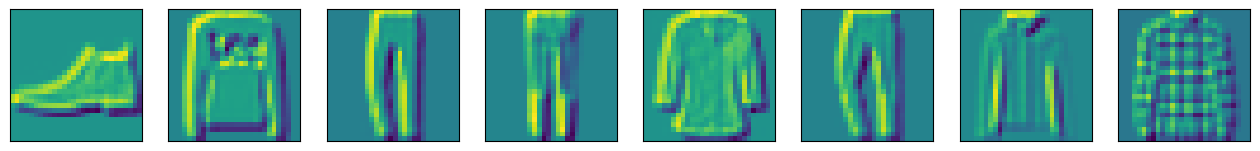

In [44]:
d2l.show_images(F.conv2d(imgs, emboss.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

高斯卷积核：模糊

In [45]:
gauss = torch.tensor([
  [1,  2,  1],
  [2,  4,  2],
  [1,  2,  1]
], dtype=torch.float32)

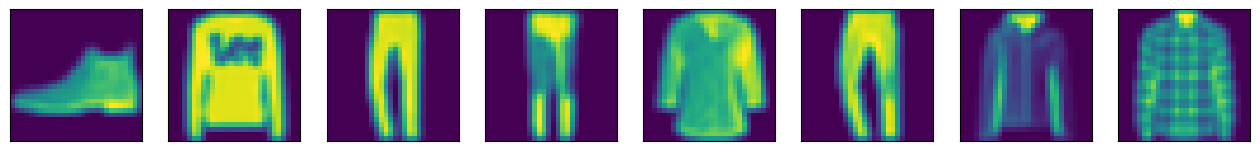

In [47]:
d2l.show_images(F.conv2d(imgs, gauss.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

均值卷积核：模糊

In [51]:
average = torch.ones((3,3), dtype=torch.float32) / 9
average

tensor([[0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111]])

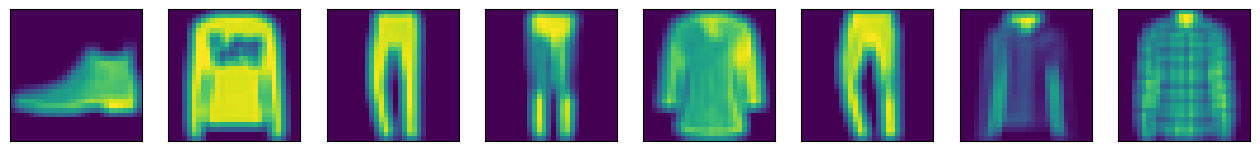

In [52]:
d2l.show_images(F.conv2d(imgs, average.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

LoG 卷积核：边缘检测，噪声抑制

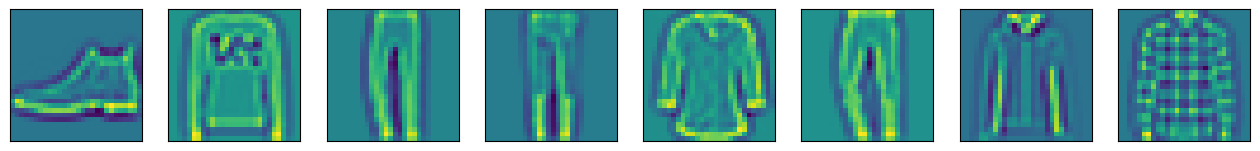

In [53]:
d2l.show_images(
  F.conv2d(
    F.conv2d(imgs, gauss.reshape((1,1,3,3)), padding=1), 
    laplacian.reshape((1,1,3,3)),
    padding=1
  ).reshape((n, 28, 28)), 1, n, scale=2);

Marr-Hildreth卷积核：边缘检测，特征提取（轮廓、形状）

In [54]:
Marr_Hildreth_3 = torch.tensor([
  [ 1, -2,  1],
  [-2,  4, -2],
  [ 1, -2,  1]
], dtype=torch.float32)

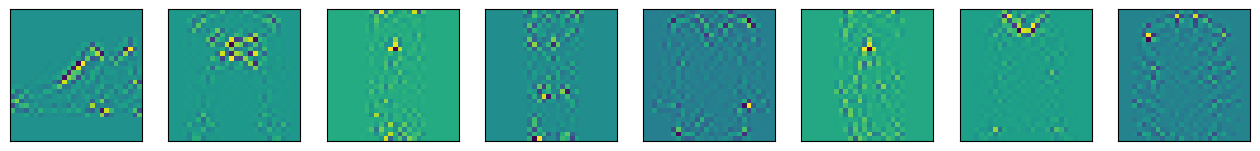

In [55]:
d2l.show_images(F.conv2d(imgs, Marr_Hildreth_3.reshape((1,1,3,3)), padding=1).reshape((n, 28, 28)), 1, n, scale=2);

In [56]:
Marr_Hildreth_5 = torch.tensor([
  [ 0,  0, -1,  0,  0],
  [ 0, -1, -2, -1,  0],
  [-1, -2, 16, -2, -1],
  [ 0, -1, -2, -1,  0],
  [ 0,  0, -1,  0,  0],
], dtype=torch.float32)

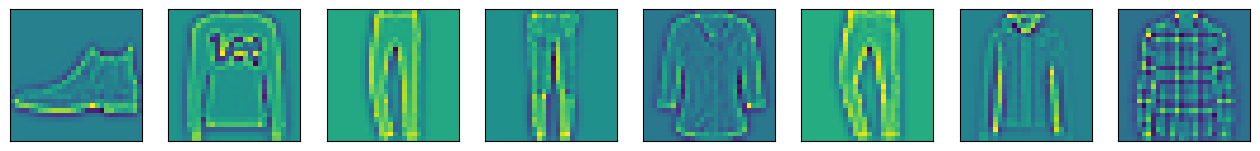

In [57]:
d2l.show_images(F.conv2d(imgs, Marr_Hildreth_5.reshape((1,1,5,5)), padding=2).reshape((n, 28, 28)), 1, n, scale=2);